In [1]:
from giagrad.tensor import Tensor
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from numpy.typing import NDArray
from tqdm import tqdm
import numpy as np
import time

# Linear regression

In [2]:
class Neuron:
    def __init__(self):
        self.w = Tensor.uniform(1,1, requires_grad=True)
        self.b = Tensor.uniform(1,1, requires_grad=True)
        self.parameters = [self.w, self.b]
        
    def __call__(self, x: NDArray):
        return self.w * x + self.b
    
    def zero_grad(self):
        for p in self.parameters:
            p.grad = np.zeros_like(p.grad)

## Data

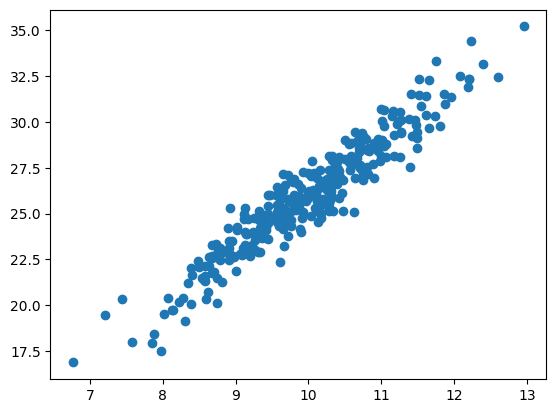

In [3]:
np.random.seed(123)
n = 300
X = np.random.normal(10, 1, n)
b = -4
y = 3 * X + b + np.random.normal(0, 1, n)

plt.scatter(X, y)
plt.show()

In [4]:
model = Neuron()

for k in (prog_bar := tqdm(range(100))):
    # forward in batches (1 batch = allData)
    y_hat = model(X)
    MSE = (y_hat - y).pow(2).sum() * (1/n) # Mean Squared Error

    # backward
    MSE.backward()
    
    # update gradient (sgd)
    learning_rate = 0.001
    for param in model.parameters:
        # grad.size = (n, 1) because batch = allData
        param.data -= learning_rate * param.grad.sum() 
    
    model.zero_grad() # reset grad
    prog_bar.set_description(f"It: {k}, loss: {MSE}")
    time.sleep(0.1 * (1.05**-k)) # see loss evolution
        

It: 99, loss: 1.0905297142329746: 100%|███████████████████████████████| 100/100 [00:02<00:00, 44.44it/s]


## Check performance

In [5]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression().fit(X.reshape((-1,1)), y)
print(f"Sklearn intercept: {sk_model.intercept_}")
print(f"Sklearn slope: {float(sk_model.coef_)}")
print()
print(f"Tensor intercept: {float(model.b.data)}")
print(f"Tensor slope: {float(model.w.data)}")

Sklearn intercept: -3.122250157919133
Sklearn slope: 2.912053529938619

Tensor intercept: 0.5718677639961243
Tensor slope: 2.545408248901367


## Plot

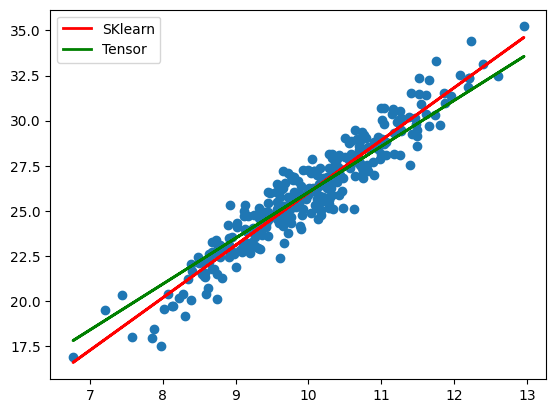

In [13]:
plt.plot(X, sk_model.coef_*X+sk_model.intercept_, color='red', linewidth=2)
plt.plot(X, model.w.data[0]*X+model.b.data[0], color='green',  linewidth=2)
plt.legend(['SKlearn', 'Tensor'])
plt.scatter(X, y)
plt.show()